In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Scratcher_ProductDetails_20191123.xlsx')
df=df.copy()
df.head()

,Game,Name,Price,Pk Size,Pk Val,Play Style,Theme,Vendor,Game Odds,Payout %,Max LT Winners,Top Prize,Top Prize Ct,Top Prizes Cashed,Validation Status,Launch Dt,End Dist Dt,End Valid Dt
0,684,SMOKIN' HOT 9'S,1,300,300,Find Number,Lucky Numbers,1,4.46,0.61909,66,900,13.0,12.0,4,2010-05-03,2010-12-31,2011-06-30
1,688,"$50,000 Double Play",5,60,300,Multiple,Money,2,3.77,0.71940,15,50000,5.0,5.0,4,2010-04-05,2010-08-19,2011-02-16
2,689,TRIPLE WIN,1,300,300,Key Number Match,Money,1,4.40,0.61990,68,1500,8.0,6.0,4,2010-03-01,2010-09-30,2011-03-30
3,690,Bingo,2,150,300,Bingo,Bingo,2,2.86,0.65044,52,10000,28.0,27.0,4,2010-02-19,2011-06-30,2011-12-28
4,692,"$50,000 Double Play",5,60,300,Multiple,Money,2,3.78,0.70254,15,50000,8.0,6.0,4,2010-06-20,2011-06-30,2011-12-28


In [3]:
df.shape

(524, 18)

In [4]:
dfcorr1= df[['Game Odds','Payout %']]
dfcorr1.head()

,Game Odds,Payout %
0,4.46,0.61909
1,3.77,0.71940
2,4.40,0.61990
3,2.86,0.65044
4,3.78,0.70254


In [5]:
# game odds and payout% are not correlated
dfcorr1.corr(method='pearson')

,Game Odds,Payout %
Game Odds,1.000000,-0.715214
Payout %,-0.715214,1.000000


In [6]:
dfcorr2= df[['Price','Payout %']]
dfcorr2.head()

,Price,Payout %
0,1,0.61909
1,5,0.71940
2,1,0.61990
3,2,0.65044
4,5,0.70254


In [7]:
# payout and price are highly postively correlated
dfcorr2.corr(method='pearson')

,Price,Payout %
Price,1.000000,0.837623
Payout %,0.837623,1.000000


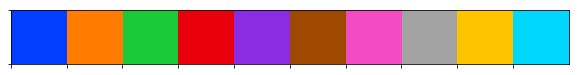

In [8]:
sns.set_palette("bright")
sns.palplot(sns.color_palette()) 

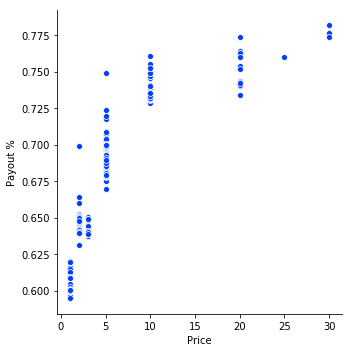

In [9]:
sns.relplot(data=df, x="Price", y="Payout %");

In [10]:
# vendors have slighlty diff pricing - price per thousand price for each game. 
# check if cost price is avialable 
#- or can generalize and make some assumptions (based on price payout)
#- can define profitability as what we might call gross gaming revenue

df[['Vendor','Game']].groupby('Vendor').count()

,Game
Vendor,
1,249
2,128
3,147


In [11]:
df['Profit'] = 1 - df['Payout %']
df.head()

,Game,Name,Price,Pk Size,Pk Val,Play Style,Theme,Vendor,Game Odds,Payout %,Max LT Winners,Top Prize,Top Prize Ct,Top Prizes Cashed,Validation Status,Launch Dt,End Dist Dt,End Valid Dt,Profit
0,684,SMOKIN' HOT 9'S,1,300,300,Find Number,Lucky Numbers,1,4.46,0.61909,66,900,13.0,12.0,4,2010-05-03,2010-12-31,2011-06-30,0.38091
1,688,"$50,000 Double Play",5,60,300,Multiple,Money,2,3.77,0.71940,15,50000,5.0,5.0,4,2010-04-05,2010-08-19,2011-02-16,0.28060
2,689,TRIPLE WIN,1,300,300,Key Number Match,Money,1,4.40,0.61990,68,1500,8.0,6.0,4,2010-03-01,2010-09-30,2011-03-30,0.38010
3,690,Bingo,2,150,300,Bingo,Bingo,2,2.86,0.65044,52,10000,28.0,27.0,4,2010-02-19,2011-06-30,2011-12-28,0.34956
4,692,"$50,000 Double Play",5,60,300,Multiple,Money,2,3.78,0.70254,15,50000,8.0,6.0,4,2010-06-20,2011-06-30,2011-12-28,0.29746


In [12]:
df.sort_values(by=['Profit'],ascending=False).head()

,Game,Name,Price,Pk Size,Pk Val,Play Style,Theme,Vendor,Game Odds,Payout %,Max LT Winners,Top Prize,Top Prize Ct,Top Prizes Cashed,Validation Status,Launch Dt,End Dist Dt,End Valid Dt,Profit
143,834,ARIZONA BLACK SPECIAL,1,300,300,Key Number Match,Specialty,1,4.41,0.59464,67,1500,8.0,6.0,4,2012-12-27,2013-06-30,2013-12-28,0.40536
331,1043,Happy Cash,1,300,300,Match 3,Whimsical,3,4.31,0.59500,69,1000,5.0,3.0,3,2016-02-01,2016-07-05,2017-01-02,0.40500
347,1059,Happy Camper,1,300,300,Find Symbol,Whimsical,3,4.31,0.59520,68,1000,5.0,3.0,3,2016-07-04,2016-11-16,2017-05-16,0.40480
111,802,30 YEARS OF FUN!,1,300,300,Find Symbol,Specialty,3,4.35,0.59590,68,1000,7.0,6.0,4,2011-10-31,2012-06-30,2012-12-28,0.40410
339,1051,35th Anniversary ($1),1,300,300,Key Number Match,Specialty,2,4.31,0.59607,69,1000,5.0,4.0,3,2016-05-02,2016-10-17,2017-04-16,0.40393


In [13]:
dfcorr3= df[['Price','Profit']]
dfcorr3.head()

,Price,Profit
0,1,0.38091
1,5,0.28060
2,1,0.38010
3,2,0.34956
4,5,0.29746


In [14]:
# profit and price are highly negatively correlated
dfcorr3.corr(method='pearson')

,Price,Profit
Price,1.000000,-0.837623
Profit,-0.837623,1.000000


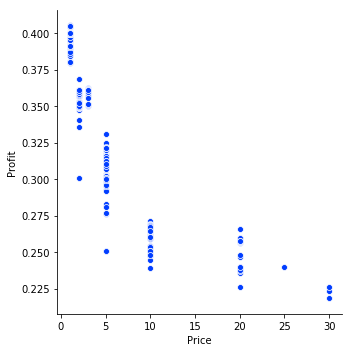

In [15]:
sns.relplot(data=df, x="Price", y="Profit");